## Machine Learning Project Code Part 1
### Meenu Ravi
### Qisheng Tang
### Amy Zheng

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("cleaned_data.csv")
data.head()

,len_title,len_abstract,num_authors,num_conflicts,num_tags,num_ivy_conflicts,num_big_four_conflicts,num_keywords_abstract,num_keywords_title,num_pages,num_sections,decision
0,10,127,4,2,1,0,0,2,0,11,9,Not Accept
1,7,95,2,1,2,0,0,1,0,11,8,Accept
2,3,250,6,2,2,0,0,1,0,15,12,Accept
3,4,147,2,2,3,0,0,1,0,15,15,Accept
4,7,158,2,3,1,0,0,1,0,14,10,Accept


### EDA

In [8]:
data.shape

(489, 12)

In [9]:
missing_values=data.isna().sum()
full=len(data)
percent=(missing_values/full)*100
percent

len_title                 0.0
len_abstract              0.0
num_authors               0.0
num_conflicts             0.0
num_tags                  0.0
num_ivy_conflicts         0.0
num_big_four_conflicts    0.0
num_keywords_abstract     0.0
num_keywords_title        0.0
num_pages                 0.0
num_sections              0.0
decision                  0.0
dtype: float64

In [10]:
data.describe()

,len_title,len_abstract,num_authors,num_conflicts,num_tags,num_ivy_conflicts,num_big_four_conflicts,num_keywords_abstract,num_keywords_title,num_pages,num_sections
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,7.304703,154.775051,3.693252,2.200409,2.077710,0.020450,0.102249,1.016360,0.028630,13.981595,8.856851
std,2.788883,48.410752,1.766020,1.440315,0.982477,0.141678,0.303286,0.872942,0.178789,4.773740,3.442734
min,1.000000,57.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,5.000000,121.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,7.000000
50%,7.000000,151.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,13.000000,9.000000
75%,9.000000,182.000000,5.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.000000,16.000000,11.000000
max,17.000000,350.000000,12.000000,11.000000,6.000000,1.000000,1.000000,4.000000,2.000000,61.000000,21.000000


In [11]:
data.dtypes

len_title                  int64
len_abstract               int64
num_authors                int64
num_conflicts              int64
num_tags                   int64
num_ivy_conflicts          int64
num_big_four_conflicts     int64
num_keywords_abstract      int64
num_keywords_title         int64
num_pages                  int64
num_sections               int64
decision                  object
dtype: object

In [12]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows: ", duplicate_rows.shape)

Duplicate rows:  (0, 12)


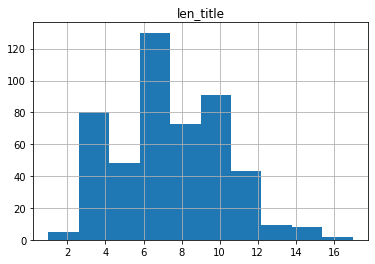

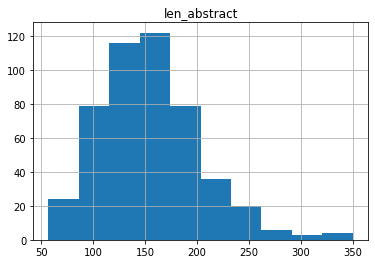

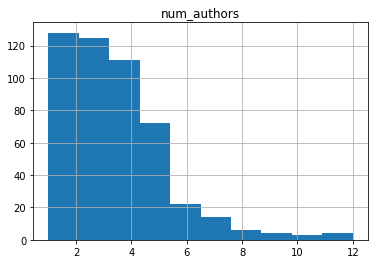

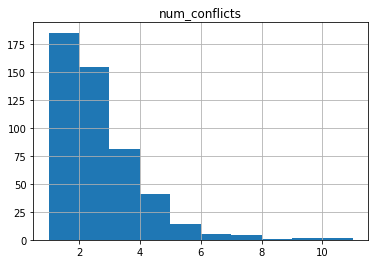

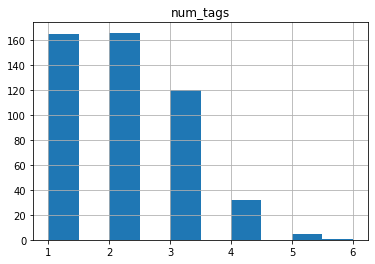

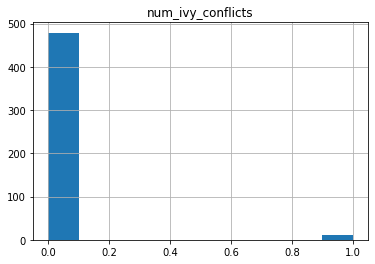

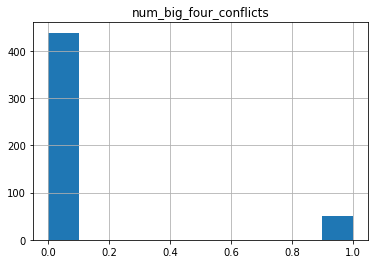

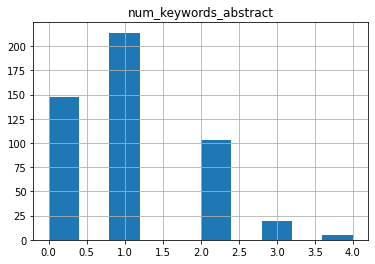

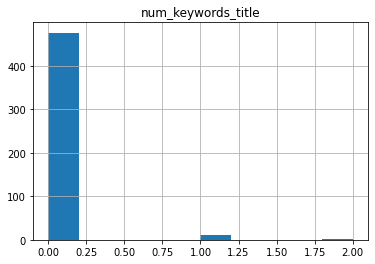

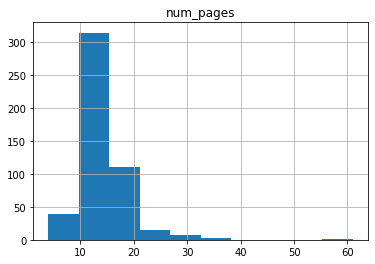

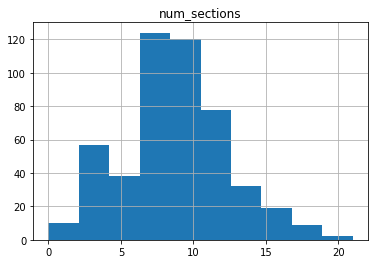

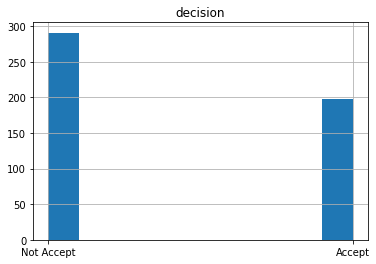

In [13]:
for i in list(data.columns):
    data[i].hist()
    plt.title(i)
    plt.show()

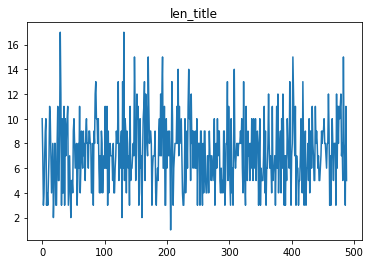

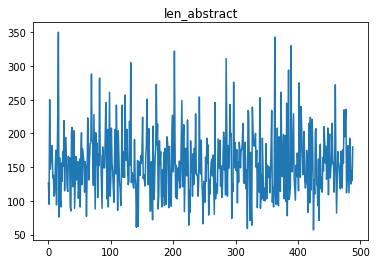

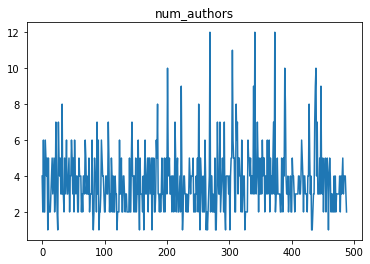

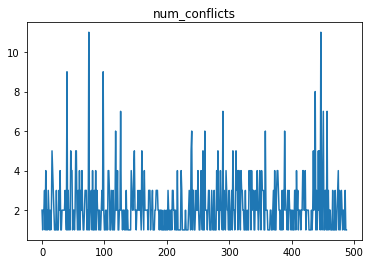

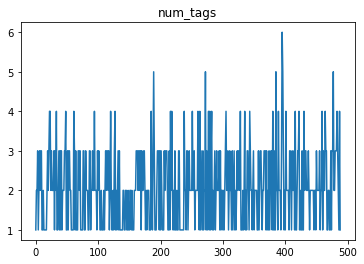

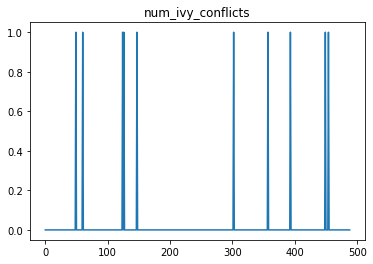

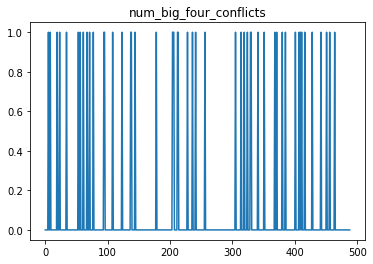

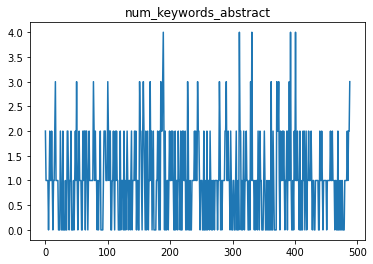

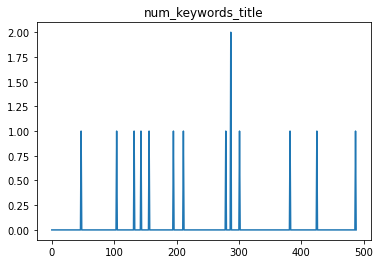

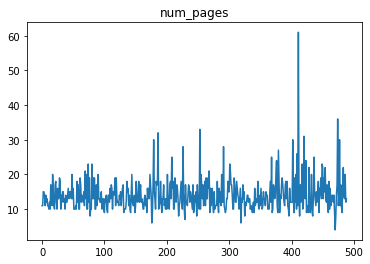

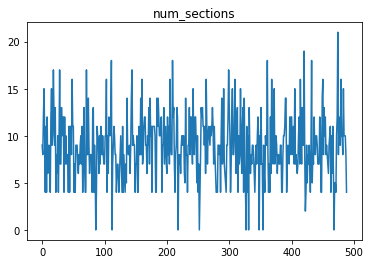

In [14]:
for i in list(data.columns):
    if i!="decision":
        data[i].plot()
        plt.title(i)
        plt.show()

,len_title,len_abstract,num_authors,num_conflicts,num_tags,num_ivy_conflicts,num_big_four_conflicts,num_keywords_abstract,num_keywords_title,num_pages,num_sections
len_title,1.00,0.07,0.03,0.07,0.02,-0.01,-0.12,0.05,-0.03,-0.08,-0.09
len_abstract,0.07,1.00,0.14,0.14,-0.02,0.02,0.01,0.18,-0.02,0.13,0.03
num_authors,0.03,0.14,1.00,0.26,0.02,-0.02,0.10,0.06,-0.10,0.07,0.06
num_conflicts,0.07,0.14,0.26,1.00,-0.00,0.03,-0.10,0.03,-0.04,-0.01,0.05
num_tags,0.02,-0.02,0.02,-0.00,1.00,-0.07,0.02,-0.01,0.06,0.08,0.07
num_ivy_conflicts,-0.01,0.02,-0.02,0.03,-0.07,1.00,-0.05,0.08,-0.02,0.06,-0.02
num_big_four_conflicts,-0.12,0.01,0.10,-0.10,0.02,-0.05,1.00,0.03,-0.05,0.13,0.04
num_keywords_abstract,0.05,0.18,0.06,0.03,-0.01,0.08,0.03,1.00,0.09,-0.02,-0.03
num_keywords_title,-0.03,-0.02,-0.10,-0.04,0.06,-0.02,-0.05,0.09,1.00,-0.04,-0.01
num_pages,-0.08,0.13,0.07,-0.01,0.08,0.06,0.13,-0.02,-0.04,1.00,0.36


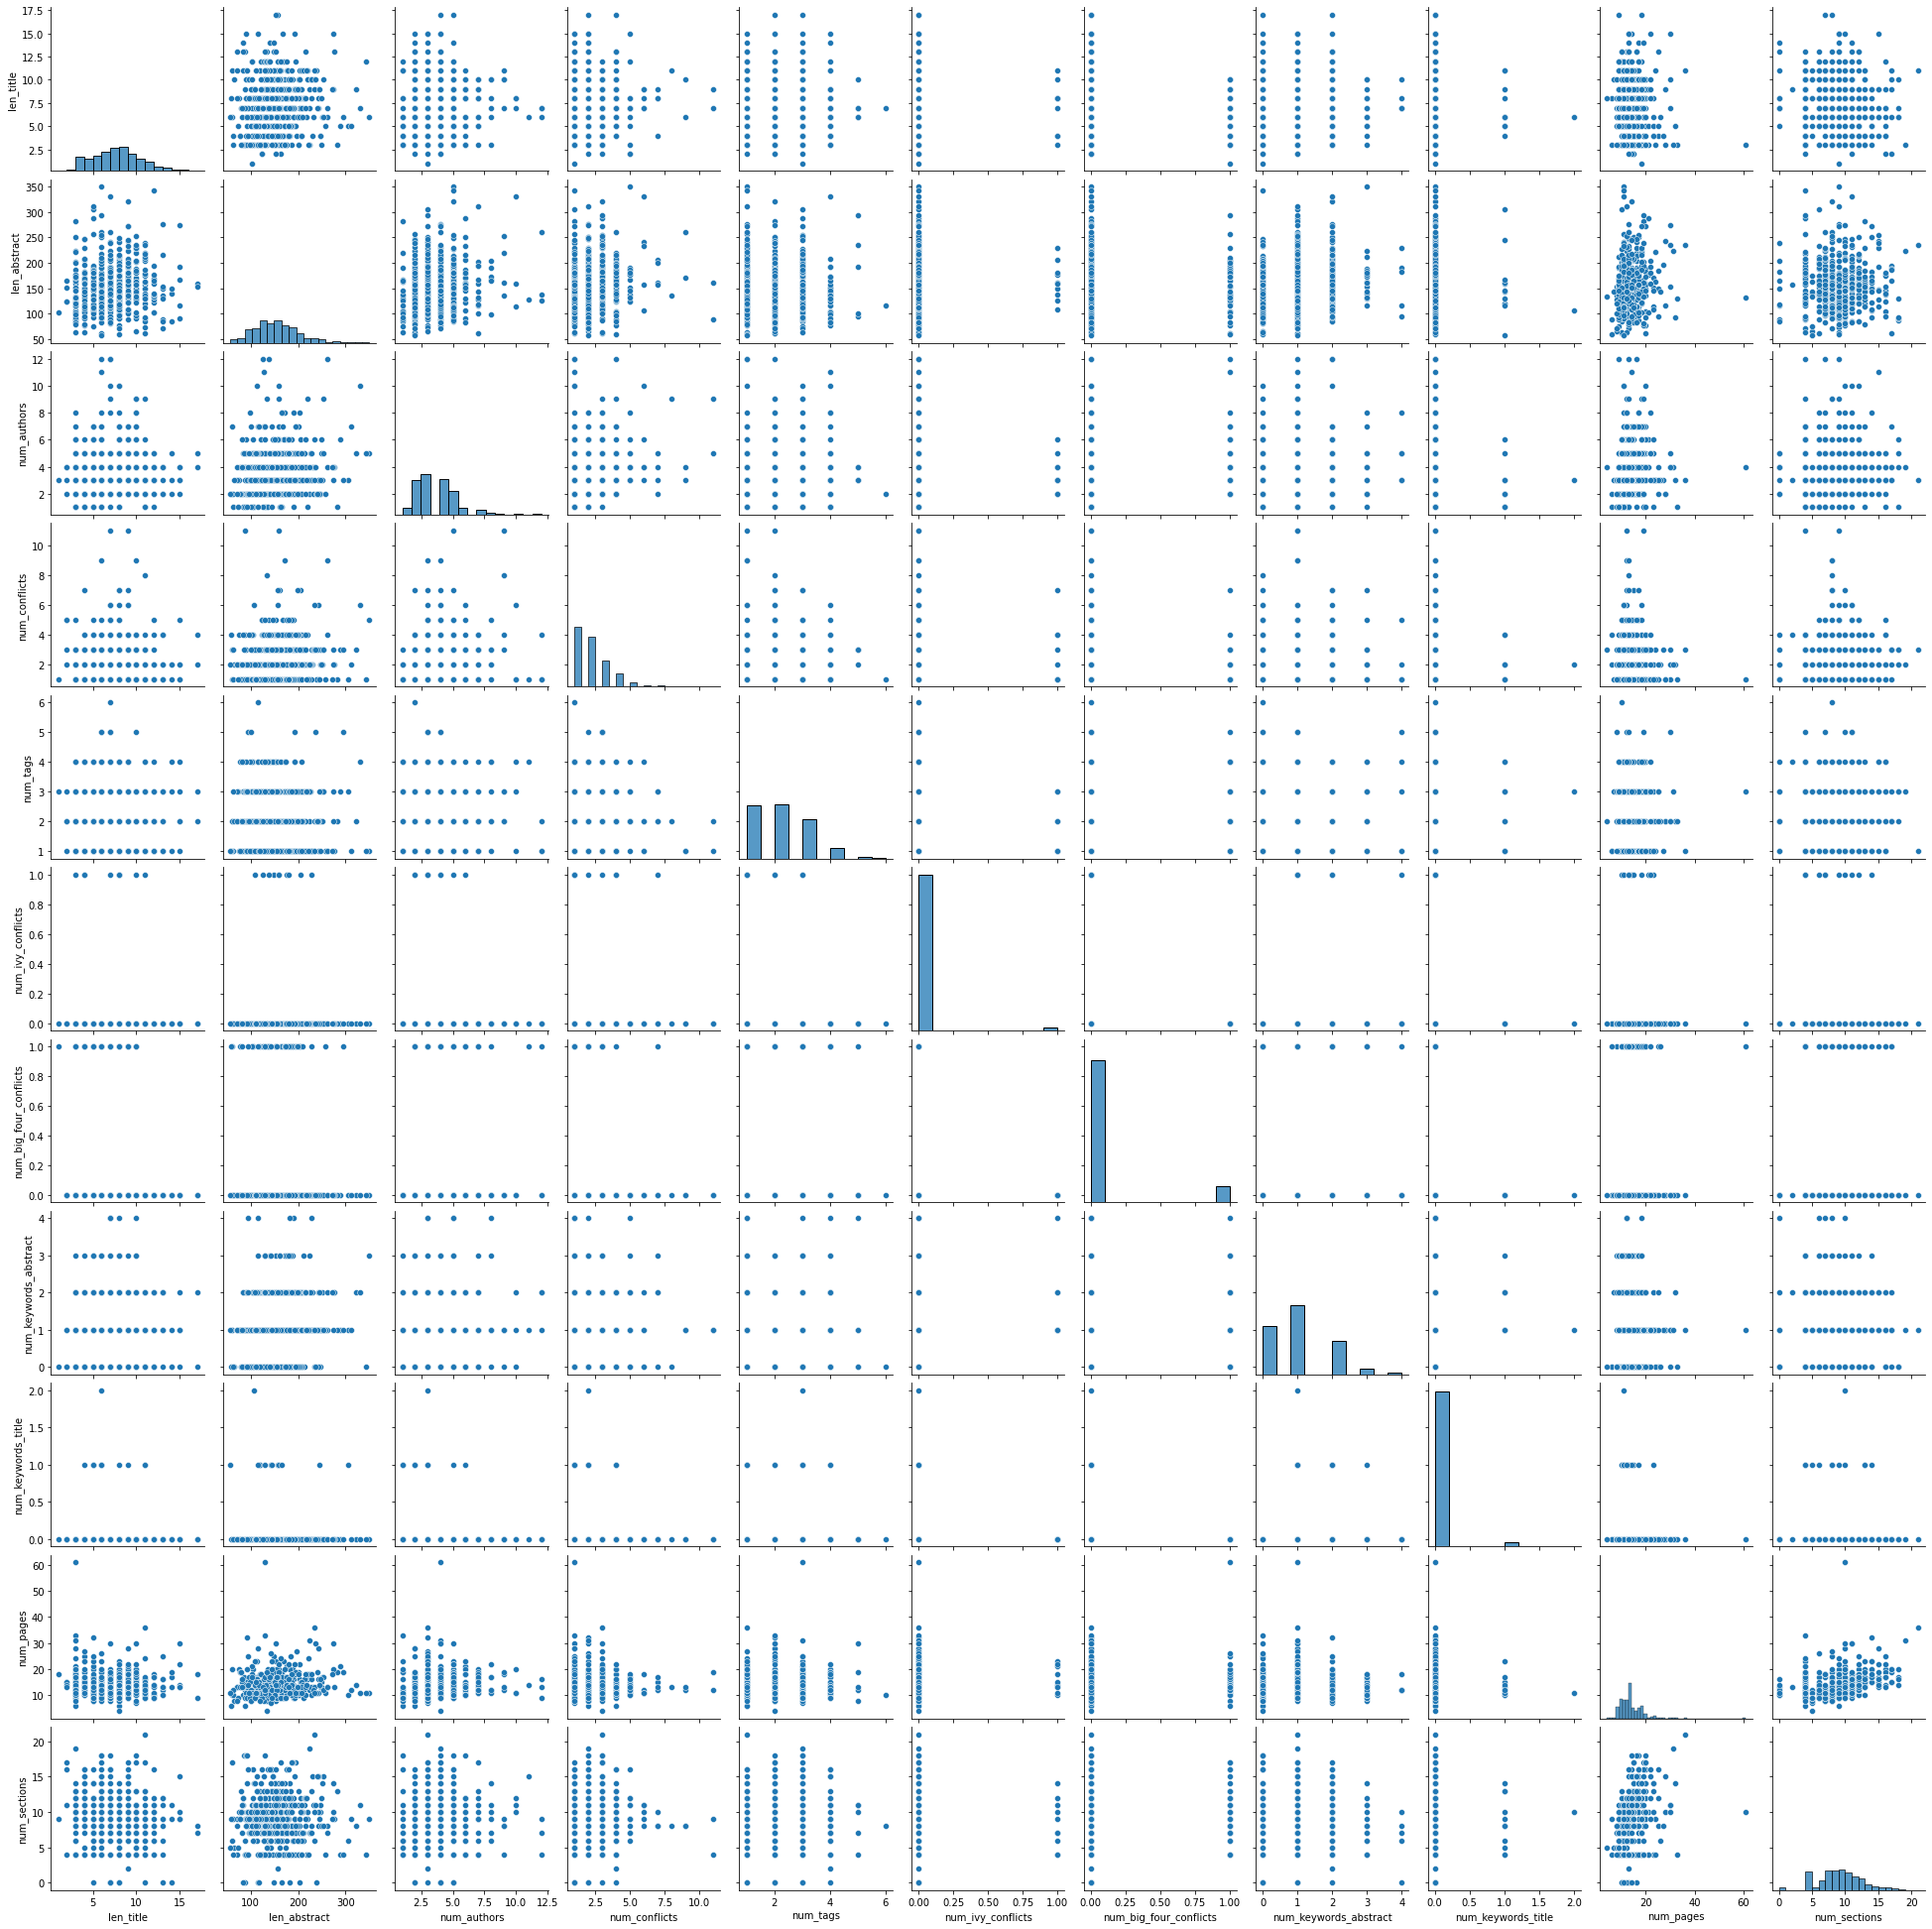

In [15]:
display(round(data.corr(),2))
sns.pairplot(data)
plt.show()

### Random Forest

In [16]:
X, y = data.iloc[:,0:11], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(366, 11)
(123, 11)
(366,)
(123,)


In [18]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [19]:
rnd_clf.score(X_test, y_test)

0.6504065040650406

In [22]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [23]:
rnd_clf.score(X_test, y_test)

0.6504065040650406

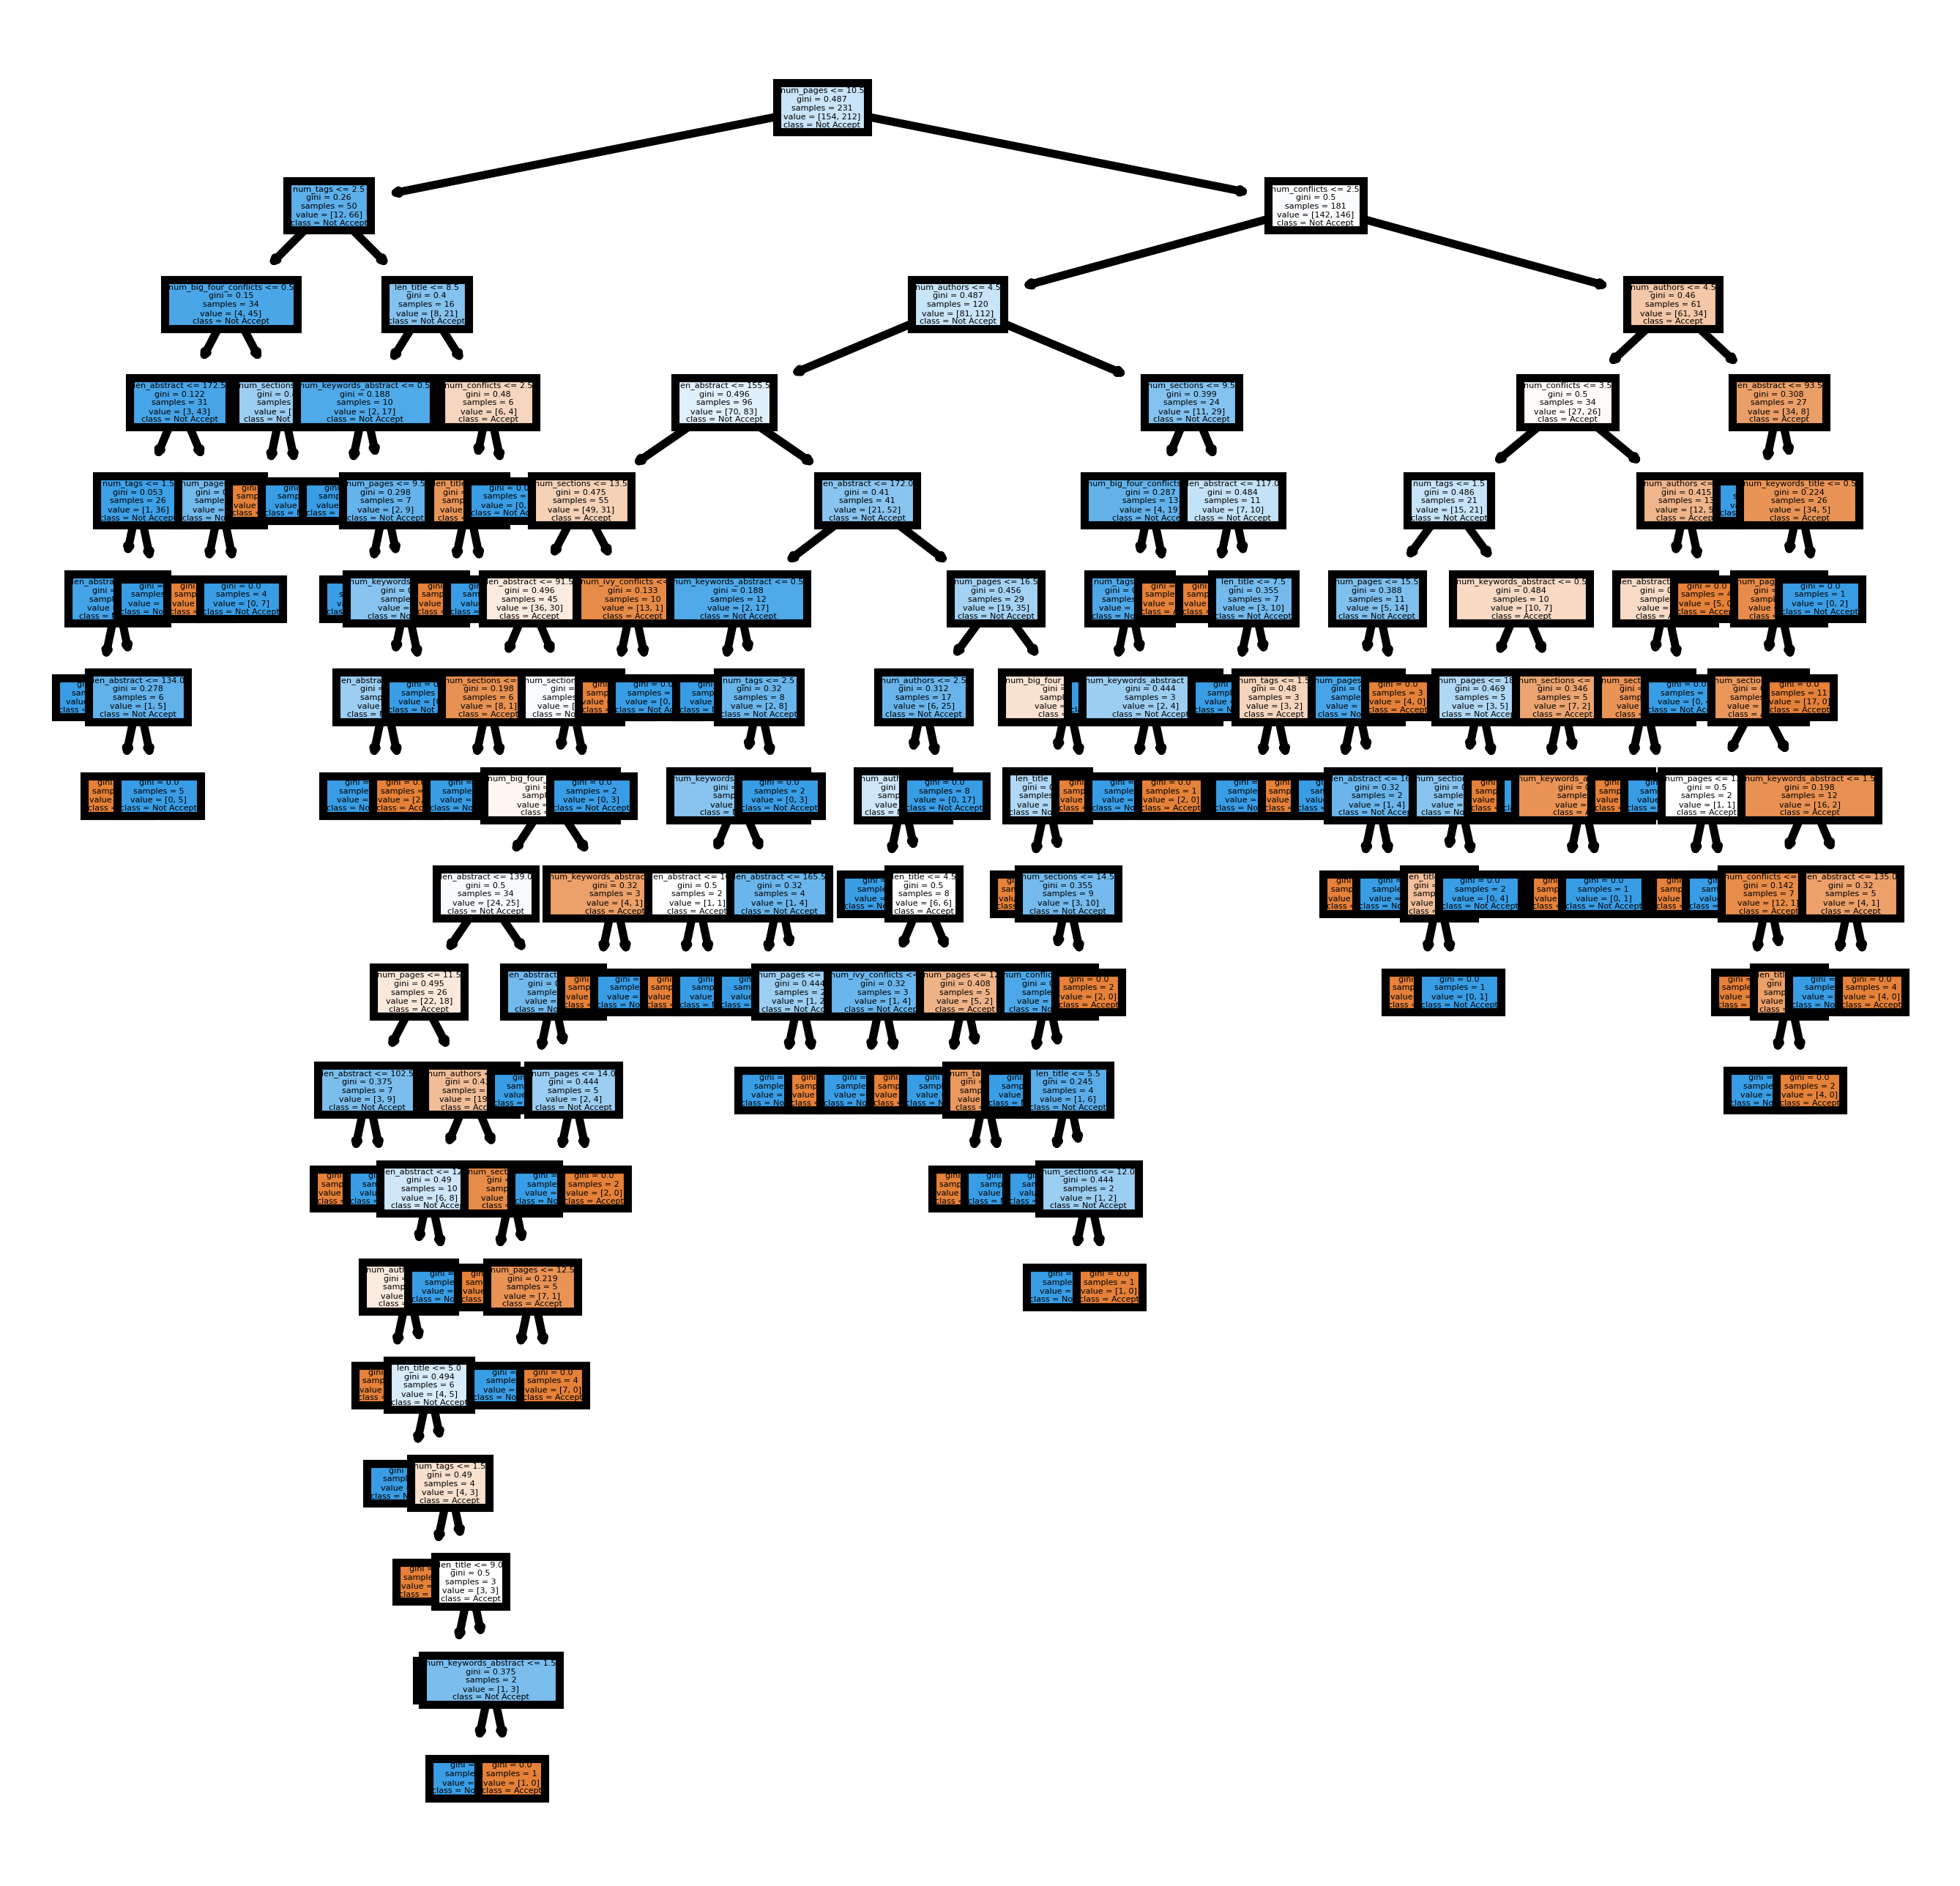

In [39]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# Export as dot file
estimator_limited = rnd_clf.estimators_[0]

tree.plot_tree(estimator_limited,
               feature_names = data.columns[0:-1], 
               class_names=['Accept','Not Accept'],
               filled = True);
fig.savefig('rf_individualtree.png')

Using Gridsearch CV

In [40]:
param_grid = [{'n_estimators': [100,200,400,500],'max_features':[5,7,9,11]}]

In [41]:
r_clf = RandomForestClassifier()
grid_search = GridSearchCV(r_clf, param_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................max_features=5, n_estimators=100; total time=   0.2s
[CV] END ...................max_features=5, n_estimators=100; total time=   0.2s
[CV] END ...................max_features=5, n_estimators=100; total time=   0.2s
[CV] END ...................max_features=5, n_estimators=100; total time=   0.2s
[CV] END ...................max_features=5, n_estimators=100; total time=   0.2s
[CV] END ...................max_features=5, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=5, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=5, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=5, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=5, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=5, n_estimators=400; total time=   0.6s
[CV] END ...................max_features=5, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [5, 7, 9, 11],
                          'n_estimators': [100, 200, 400, 500]}],
             verbose=2)

In [42]:
grid_search.best_estimator_

RandomForestClassifier(max_features=7, n_estimators=200)

In [43]:
grid_search.best_score_

0.6557941503146982

Now, trying using PCA and using dimension reduction

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.998) + 1
d
# cumsum

5

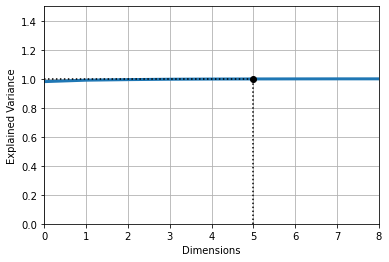

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1.5])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.998], "k:")
plt.plot([0, d], [0.998, 0.998], "k:")
plt.plot(d, 0.998, "ko")
plt.grid(True)

plt.show()

In [71]:
import time

t0 = time.time()
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_train)

In [72]:
param_grid = [{'n_estimators': [100,200,300,400,500]}]

In [73]:
r_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(r_clf, param_grid, cv=5,verbose=2)
grid_search.fit(X_reduced, y_train)
t1 = time.time()

total = t1-t0
print(total)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=300; total time=   0.4s
[CV] END ...................................n_est

In [69]:
grid_search.best_estimator_

RandomForestClassifier(random_state=42)

In [70]:
grid_search.best_score_

0.661162532395409